In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


train_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/train_df.csv")
validation_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/validation_df.csv")

training_features = train_df.drop(columns=['Datum', "Umsatz"])
training_labels = train_df["Umsatz"]
validation_features = validation_df.drop(columns=['Datum', "Umsatz"])
validation_labels = validation_df["Umsatz"]

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(100, activation='relu'),
  Dense(40, activation='relu'),
  Dense(10, activation='relu'),
  Dense(1)
])

model.summary()


2025-01-03 09:38:44.133728: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 09:38:44.141600: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 09:38:44.216273: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 09:38:44.336782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735893524.428314   10730 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735893524.44

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         2,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         4,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,473 (29.19 KB)

 Trainable params: 7,417 (28.97 KB)

 Non-trainable params: 56 (224.00 B)

In [2]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=40,
                    validation_data=(validation_features, validation_labels))

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 50301.2734 - val_loss: 5178.0591
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7202.6621 - val_loss: 4109.6821
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7978.0815 - val_loss: 3944.1953
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5570.5889 - val_loss: 4533.1216
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5441.9053 - val_loss: 3785.7979
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5954.9082 - val_loss: 4856.5190
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5720.5898 - val_loss: 4987.3315
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6653.6816 - val_loss: 4188.1831
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5708.6348 - val_loss: 4262.2646
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5452.7310 - val_loss: 4560.5498
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5615.4761 - val_l

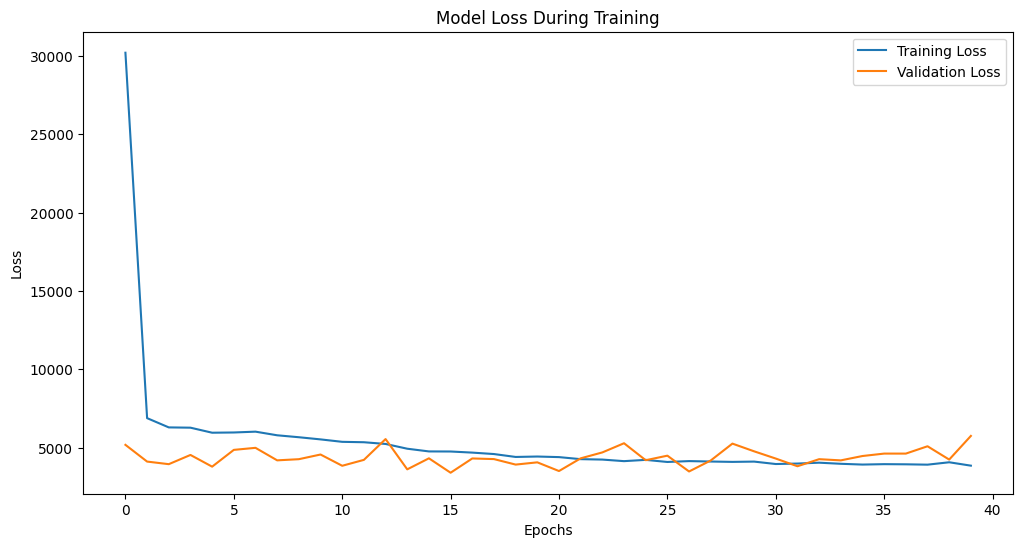

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
import numpy as np

""" def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100 """

from sklearn.metrics import mean_absolute_percentage_error

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

mape = mean_absolute_percentage_error(validation_labels, validation_predictions)

print(f"MAPE on the Validation Data: {mape:.2f}")

""" print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%") """

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
MAPE on the Validation Data: 0.32


' print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")\nprint(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%") '

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


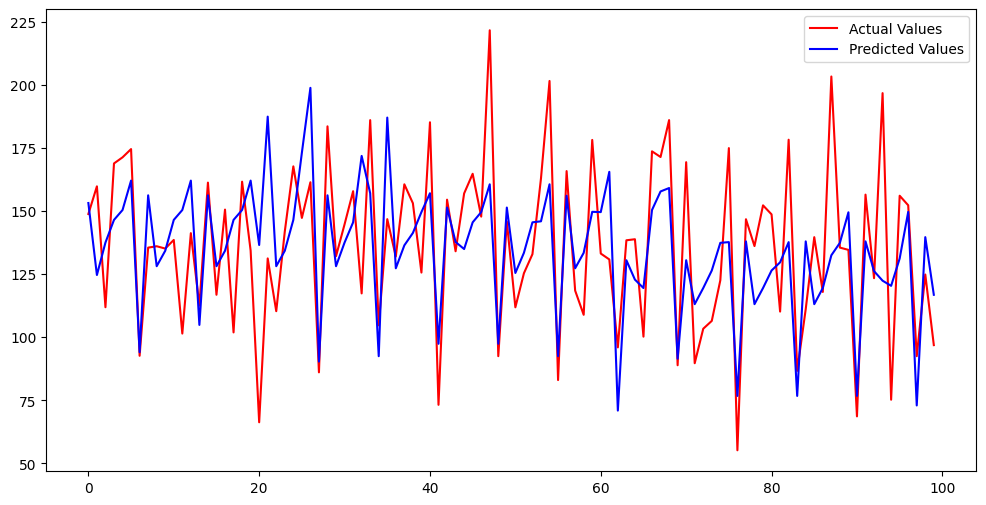

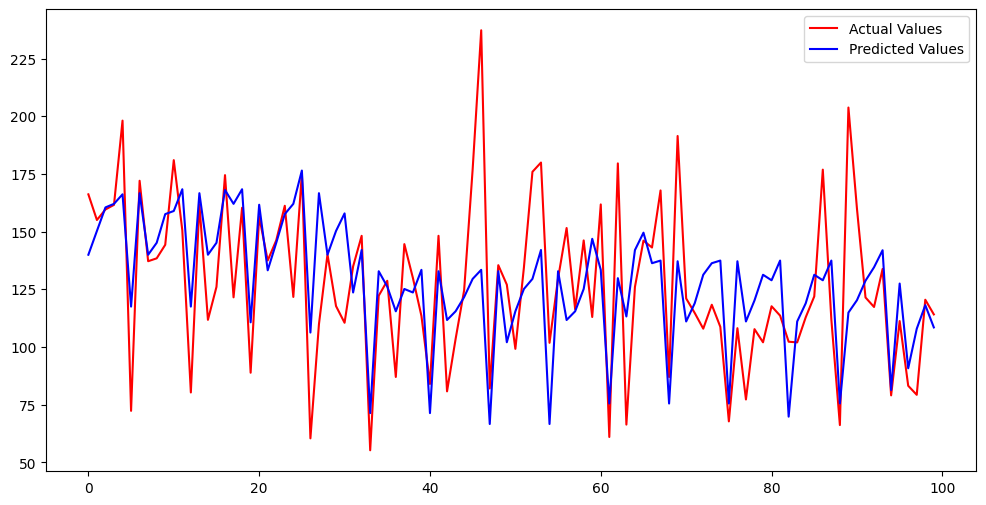

In [5]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [6]:
test_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/test_df.csv")

test_features = test_df.drop(columns=['id', "Datum", "Umsatz"])

predictions = model.predict(test_features)

test_df['Umsatz'] = predictions

submission_df = test_df[['id', 'Umsatz']]

submission_df.to_csv("submission_model_2.csv", index=False)

 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
